In [12]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

raw_df_1=pd.read_csv('/content/gdrive/MyDrive/FS-Sem3/CompanyProject_RegHub/raw_data/raw_data_competitor_monitoring_1.csv')
print(f"Length of raw dataframe = {len(raw_df_1)}")
raw_df_1.head(2)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Length of raw dataframe = 4771


,_id,_index,_score,_type,concepts,found_dates,id,internal_links,keywords,language,...,news_summary,news_title,news_topic,news_type,references,sentiment_label,sentiment_score,source_country,source_name,source_type
0,FinenfreiPresostenfrei12884764,2021_reghub_new,NaN,_doc,NaN,[],FinenfreiPresostenfrei12884764,[],NaN,de,...,The article discusses how a fortunate man with...,Tradingaktion mit comdirect Handeln Sie Socié...,"[{""description"":""Online Banken und Vermögensve...",Press releases,[],NaN,0.0,Germany,Finanzen.net,Information Provider
1,focScholzPresid217207826html,2021_reghub_new,NaN,_doc,NaN,[],focScholzPresid217207826html,[],NaN,en,...,The article discusses how M.M. Warburg may hav...,CumExAffäre: Brisante Tagebucheinträge belaste...,"[{""description"":""M.M. Warburg"",""relevance"":12,...",Press releases,[],NaN,0.0,Global,focus.de,Information Provider


In [14]:
raw_df_2=pd.read_excel('/content/gdrive/MyDrive/FS-Sem3/CompanyProject_RegHub/raw_data/raw_data_competitor_monitoring_2.xlsx')
print(f"Length of raw dataframe = {len(raw_df_2)}")
raw_df_2.head(2)

Length of raw dataframe = 14608


,_id,_index,_score,_type,concepts,found_dates,id,internal_links,keywords,language,...,news_summary,news_title,news_topic,news_type,references,sentiment_label,sentiment_score,source_country,source_name,source_type
0,fin1023Preslofreshbuy917302,2021_reghub_new,NaN,_doc,NaN,[],fin1023Preslofreshbuy917302,[],NaN,en,...,Berenberg Bank analysts have provided a buy ra...,HelloFresh Buy von Joh. Berenberg Gossler & Co...,"[{""description"":""Berenberg Bank"",""relevance"":4...",Press releases,[],NaN,0.0,Global,finanzen.at,Information Provider
1,finichtenStoceaaufbuy322htm,2021_reghub_new,NaN,_doc,NaN,[],finichtenStoceaaufbuy322htm,[],NaN,en,...,"The article states that Berenberg, a German in...",BERENBERG stuft Nordea auf 'Buy' Finanznachri...,"[{""description"":""Berenberg Bank"",""relevance"":6...",Stock Analysis,[],NaN,0.0,Global,finanznachrichten.de,Information Provider


In [15]:
#merge raw data
frames = [raw_df_1, raw_df_2]
raw_df_concat = pd.concat(frames)
raw_df = raw_df_concat.drop_duplicates(subset='_id', keep='first') # remove duplicate rows
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14700 entries, 0 to 14607
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                14699 non-null  object 
 1   _index             14694 non-null  object 
 2   _score             26 non-null     object 
 3   _type              14672 non-null  object 
 4   concepts           2251 non-null   object 
 5   found_dates        13943 non-null  object 
 6   id                 14675 non-null  object 
 7   internal_links     13894 non-null  object 
 8   keywords           2357 non-null   object 
 9   language           14658 non-null  object 
 10  news_author        1988 non-null   object 
 11  news_content       14667 non-null  object 
 12  news_date          14659 non-null  object 
 13  news_label         248 non-null    object 
 14  news_last_updated  8 non-null      object 
 15  news_legalinforce  14659 non-null  object 
 16  news_link          146

In [16]:
news_df = raw_df[['id', 'found_dates', 'news_date', 'news_title',
       'internal_links', 'keywords', 'language', 'news_author', 'news_content',
       'news_label', 'news_legalinforce',
       'news_link', 'news_rank', 'news_summary', 'news_topic',
       'news_type', 'sentiment_label', 'sentiment_score',
       'source_country', 'source_name', 'source_type']]

news_df.head(3)

,id,found_dates,news_date,news_title,internal_links,keywords,language,news_author,news_content,news_label,...,news_link,news_rank,news_summary,news_topic,news_type,sentiment_label,sentiment_score,source_country,source_name,source_type
0,FinenfreiPresostenfrei12884764,[],2023-10-03T18:00:43.000Z,Tradingaktion mit comdirect Handeln Sie Socié...,[],NaN,de,NaN,The article discusses how a fortunate man with...,NaN,...,https://www.finanzen.net/nachricht/rohstoffe/t...,0.0,The article discusses how a fortunate man with...,"[{""description"":""Online Banken und Vermögensve...",Press releases,NaN,0.0,Germany,Finanzen.net,Information Provider
1,focScholzPresid217207826html,[],2023-10-03T16:59:33.000Z,CumExAffäre: Brisante Tagebucheinträge belaste...,[],NaN,en,NaN,The article discusses how M.M. Warburg may hav...,NaN,...,https://www.focus.de/politik/staatsanwaltschaf...,0.0,The article discusses how M.M. Warburg may hav...,"[{""description"":""M.M. Warburg"",""relevance"":12,...",Press releases,NaN,0.0,Global,focus.de,Information Provider
2,merngnisPresente92556026html,[],2023-10-03T16:06:01.000Z,CumExAffäre: Dokumente bringen Scholz offenbar...,[],NaN,en,NaN,The Cologne Prosecutor's Office accuses German...,NaN,...,https://www.merkur.de/politik/scholz-cum-ex-af...,0.0,The Cologne Prosecutor's Office accuses German...,"[{""description"":""M.M. Warburg"",""relevance"":6,""...",Press releases,NaN,0.0,Global,merkur.de,Information Provider


In [17]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14700 entries, 0 to 14607
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14675 non-null  object 
 1   found_dates        13943 non-null  object 
 2   news_date          14659 non-null  object 
 3   news_title         14650 non-null  object 
 4   internal_links     13894 non-null  object 
 5   keywords           2357 non-null   object 
 6   language           14658 non-null  object 
 7   news_author        1988 non-null   object 
 8   news_content       14667 non-null  object 
 9   news_label         248 non-null    object 
 10  news_legalinforce  14659 non-null  object 
 11  news_link          14667 non-null  object 
 12  news_rank          14659 non-null  float64
 13  news_summary       14660 non-null  object 
 14  news_topic         14654 non-null  object 
 15  news_type          14654 non-null  object 
 16  sentiment_label    207

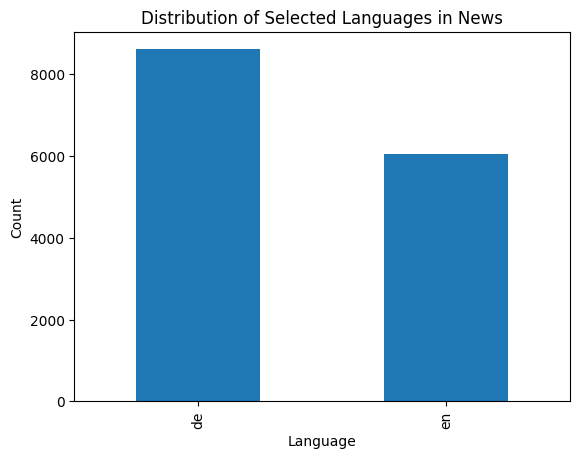

In [18]:
frequent_languages = ['en', 'de']
filtered_df = news_df[news_df['language'].isin(frequent_languages)]
filtered_df['language'].value_counts().plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Distribution of Selected Languages in News')
plt.show()

In [19]:
news_df_en = news_df[news_df.language == 'en']
print(len(news_df_en))
news_df_en.head(5)

6040


,id,found_dates,news_date,news_title,internal_links,keywords,language,news_author,news_content,news_label,...,news_link,news_rank,news_summary,news_topic,news_type,sentiment_label,sentiment_score,source_country,source_name,source_type
1,focScholzPresid217207826html,[],2023-10-03T16:59:33.000Z,CumExAffäre: Brisante Tagebucheinträge belaste...,[],NaN,en,NaN,The article discusses how M.M. Warburg may hav...,NaN,...,https://www.focus.de/politik/staatsanwaltschaf...,0.0,The article discusses how M.M. Warburg may hav...,"[{""description"":""M.M. Warburg"",""relevance"":12,...",Press releases,NaN,0.0,Global,focus.de,Information Provider
2,merngnisPresente92556026html,[],2023-10-03T16:06:01.000Z,CumExAffäre: Dokumente bringen Scholz offenbar...,[],NaN,en,NaN,The Cologne Prosecutor's Office accuses German...,NaN,...,https://www.merkur.de/politik/scholz-cum-ex-af...,0.0,The Cologne Prosecutor's Office accuses German...,"[{""description"":""M.M. Warburg"",""relevance"":6,""...",Press releases,NaN,0.0,Global,merkur.de,Information Provider
3,maretBeatPresfiling20231003,[],2023-10-03T15:45:10.000Z,K.J. Harrison & Partners Inc Boosts Stake in C...,[],NaN,en,NaN,Deutsche Bank AG has acquired an additional 49...,NaN,...,https://www.marketbeat.com/instant-alerts/nyse...,0.0,Deutsche Bank AG has acquired an additional 49...,"[{""description"":""Deutsche Bank"",""relevance"":6,...",Press releases,NaN,0.0,Global,marketbeat.com,Information Provider
4,AlllationPres202310030398html,[],2023-10-03T15:40:05.000Z,Mozambique: Govt Wins Massive Debt Cancellation,[],NaN,en,NaN,Mozambique has reached a negotiated agreement ...,NaN,...,https://allafrica.com/stories/202310030398.html,0.0,Mozambique has reached a negotiated agreement ...,"[{""description"":""Financial Crime"",""relevance"":...",Press releases,NaN,0.0,Africa,AllAfrica,Information Provider
5,busTIMESPresesginvestingubs,[],2023-10-03T15:35:31.000Z,Conference aims to connect investors as ESG tr...,[],NaN,en,NaN,The UBS APAC Sustainable Finance Conference 20...,NaN,...,https://www.businesstimes.com.sg/wealth/sustai...,0.0,The UBS APAC Sustainable Finance Conference 20...,"[{""description"":""Sustainability"",""relevance"":6...",Press releases,NaN,0.0,Global,businesstimes.com.sg,Information Provider


In [ ]:
# sample news content and news summary

index = 2300

print(f"web_url: {news_df_en.news_link[index]}")
print(f"topic: {news_df_en.news_topic[index]}")
print(f"content: {news_df_en.news_content[index]}")
print(f"summary: {news_df_en.news_summary[index]}")


web_url: https://www.zonebourse.com/cours/action/KERING-4683/actualite-broker/Kering-Oddo-BHF-reste-a-neutre-avant-les-semestriels-44365621/
topic: [{"description":"ODDO BHF","relevance":21,"comment":"; ; ; ; ; ; ; ; ; ; ; ; ; ; ; ; ; ; ; ; ; ; ; ; ; ; oddo bhf; ; "}]
content: The article discusses the view of financial services company Oddo BHF on luxury goods company Kering ahead of its semi-annual results. Oddo BHF has maintained its neutral rating on Kering and has set a target price of \u20ac616. The analysis takes into account the potential impact of the COVID-19 pandemic on the luxury industry and highlights the uncertainties that lie ahead. While Kering's performance in the first quarter was strong, with revenue growth of 21.4%, concerns remain about the sustainability of this growth and the potential slowdown in the Chinese market. Oddo BHF emphasizes the importance of Kering's e-commerce strategy and the need for maintaining a balance between digital channels and physical ret

In [ ]:
len(news_df_en[news_df_en.news_content == news_df_en.news_summary])
# almost all news summaries are same as news contents

5766

In [ ]:
%pip install "accelerate>=0.16.0,<1" "transformers[torch]>=4.28.1,<5" "torch>=1.13.1,<2" "bitsandbytes>=0.40.2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 976.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.1 MB/s eta 0:00:00
  Attempting uninstall:

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' cre

In [ ]:
import torch
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    pipeline,
)

model_name="meta-llama/Llama-2-7b-chat-hf" # Model from hugging face
device_map = {"": 0} # Load the entire model on the GPU 0
use_4bit = True # Activate 4-bit precision base model loading
bnb_4bit_compute_dtype = "float16" # Compute dtype for 4-bit base models
bnb_4bit_quant_type = "nf4" # Quantization type (fp4 or nf4)
use_nested_quant = False # Activate nested quantization for 4-bit base models (double quantization)
compute_dtype = getattr(torch, bnb_4bit_compute_dtype) # Load tokenizer and model with QLoRA configuration

bnb_config = BitsAndBytesConfig(
    load_in_4bit=use_4bit,
    bnb_4bit_quant_type=bnb_4bit_quant_type,
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=use_nested_quant,
    )

# Check GPU compatibility with bfloat16
if compute_dtype == torch.float16 and use_4bit:
    major, _ = torch.cuda.get_device_capability()
    if major >= 8:
        print("=" * 80)
        print("Your GPU supports bfloat16: accelerate training with bf16=True")
        print("=" * 80)

# Load base model
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map=device_map
)
model.config.use_cache = False
model.config.pretraining_tp = 1

# Load LLaMA tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right" # Fix weird overflow issue with fp16 training

#generate_text = pipeline(model="meta-llama/Llama-2-7b-chat-hf", torch_dtype=torch.bfloat16, trust_remote_code=True, device_map="auto")
#generate_text = pipeline(model=model, tokenizer=tokenizer, torch_dtype=torch.bfloat16, device_map="auto")
#generate_text = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=350)
generate_text = pipeline(task="text-generation", model=model, tokenizer=tokenizer, device_map="auto", torch_dtype=torch.bfloat16, max_length=256)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
res = generate_text("Explain to me the difference between nuclear fission and fusion.")
print(res[0]["generated_text"])


Explain to me the difference between nuclear fission and fusion. Unterscheidung between nuclear fission and fusion: 1. Fission is a process in which a heavy nucleus splits into two or more lighter nuclei, releasing a large amount of energy in the process. Fusion, on the other hand, is the process in which two or more light nuclei combine to form a single, heavier nucleus. 2. Fission typically occurs at high temperatures and pressures, while fusion typically occurs at very high temperatures and pressures. 3. Fission releases a large amount of energy, but it also produces radioactive waste that can be harmful to the environment and human health. Fusion, on the other hand, produces little to no radioactive waste and is considered a cleaner and more sustainable energy source. 4. Fission is typically used in nuclear power plants to generate electricity, while fusion is still in the experimental stage and has not yet been used to generate electricity on a commercial scale. 5. Fission is a mo

In [ ]:
res = generate_text("'The article discusses the view of financial services company Oddo BHF on luxury goods company Kering ahead of its semi-annual results. Oddo BHF has maintained its neutral rating on Kering and has set a target price of \u20ac616. The analysis takes into account the potential impact of the COVID-19 pandemic on the luxury industry and highlights the uncertainties that lie ahead. While Kering's performance in the first quarter was strong, with revenue growth of 21.4%, concerns remain about the sustainability of this growth and the potential slowdown in the Chinese market. Oddo BHF emphasizes the importance of Kering's e-commerce strategy and the need for maintaining a balance between digital channels and physical retail locations. Overall, the article highlights the cautious stance of Oddo BHF regarding Kering's prospects in light of the evolving market conditions.' - What companies are being discussed in the text, just answer with the names of them (in order of importance) separated by commas.")
print(res[0]["generated_text"])

'The article discusses the view of financial services company Oddo BHF on luxury goods company Kering ahead of its semi-annual results. Oddo BHF has maintained its neutral rating on Kering and has set a target price of €616. The analysis takes into account the potential impact of the COVID-19 pandemic on the luxury industry and highlights the uncertainties that lie ahead. While Kering's performance in the first quarter was strong, with revenue growth of 21.4%, concerns remain about the sustainability of this growth and the potential slowdown in the Chinese market. Oddo BHF emphasizes the importance of Kering's e-commerce strategy and the need for maintaining a balance between digital channels and physical retail locations. Overall, the article highlights the cautious stance of Oddo BHF regarding Kering's prospects in light of the evolving market conditions.' - What companies are being discussed in the text, just answer with the names of them (in order of importance) separated by commas

In [ ]:
news_df_en['llm_output_company'] = ""
news_df_en['companies_in_news'] = ""

max_prompt_length = 200
shortened_news_df = news_df_en[news_df_en['news_content'].apply(lambda x: len(x.split()) <= max_prompt_length)]
len(shortened_news_df)

<ipython-input-16-3f40701712ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df_en['llm_output_company'] = ""
<ipython-input-16-3f40701712ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df_en['companies_in_news'] = ""


5588

In [ ]:
# Filter out the specific warning
warnings.filterwarnings("ignore", category=UserWarning, module="transformers.pipelines.base")

for index, row in shortened_news_df.iterrows():
    prompt = "'" + row['news_content'] + "'" + " - What companies are being discussed in the text, just answer with the names of them (in order of importance) separated by commas. If there is only one company, do not use comma in your response."
    shortened_news_df.at[index, 'llm_output_company'] = generate_text(prompt)[0]["generated_text"]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1281: UserWarning: Input length of input_ids is 303, but `max_length` is set to 256. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1281: UserWarning: Input length of input_ids is 402, but `max_length` is set to 256. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1281: UserWarning: Input length of input_ids is 258, but `max_length` is set to 256. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1281: UserWarning: Input length of input_ids is 441, but `max_length` is set to 256. This can lead to unexpected behavior. You should conside

In [ ]:
# # Maybe a better code for last cell! ---> This fixes the warnings received in the previous cell.

# for index, row in shortened_news_df.iterrows():
#     prompt = "'" + row['news_content'] + "'" + " - What companies are being discussed in the text, just answer with the names of them (in order of importance) separated by commas. If there is only one company, do not use a comma in your response."
#     input_ids = tokenizer.encode(prompt, return_tensors='pt')
#     max_length = len(input_ids[0]) + 256  #we can adjust this length of 256 according to our needs
#     shortened_news_df.at[index, 'llm_output_company'] = generate_text(prompt, max_length=max_length)[0]["generated_text"]

In [ ]:
#extract company names from model output
for index, row in shortened_news_df.iterrows():
  split_text = row['llm_output_company'].split("What companies are being discussed in the text, just answer with the names of them (in order of importance) separated by commas. If there is only one company, do not use comma in your response.")
  if len(split_text) > 1:
    shortened_news_df.at[index, 'companies_in_news'] = split_text[1].strip()
  else:
    shortened_news_df.at[index, 'companies_in_news'] =  ""

In [ ]:
# Save the DataFrame to a CSV file
shortened_news_df.to_csv('news_df_with_company_names.csv', index=False)

# Download the CSV file to your local machine
from google.colab import files
files.download('news_df_with_company_names.csv')

shortened_news_df[['news_content','companies_in_news']]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,news_content,companies_in_news
1,The article discusses how M.M. Warburg may hav...,"Nordea, Berenberg"
2,The Cologne Prosecutor's Office accuses German...,"Sanofi, Berenberg Bank"
3,Deutsche Bank AG has acquired an additional 49...,"Berenberg Bank, Sartorius"
4,Mozambique has reached a negotiated agreement ...,"Sanofi, Berenberg"
5,The UBS APAC Sustainable Finance Conference 20...,"Answer:\n\nBerenberg, Sebastian Bray"
...,...,...
14593,UBS Switzerland’s largest bank has warned abou...,"UBS, Switzerland.\nIn the text, UBS Switzerlan..."
14596,Morrison & Co appoints Board Director Submitte...,Morrison & Co Kate Mingay UBS Goldman Sachs We...
14598,UBS has reported a net profit of CHF 2.6bn ($2...,UBS
14599,"UBS, the Swiss multinational investment bank a...",
